In [61]:
pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.1/302.1 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [62]:
import wandb

In [63]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [64]:
run = wandb.init(project="urlset-phishing3")

wandb: Currently logged in as: lornakiragu1 (lornakiragu1-usiu). Use `wandb login --relogin` to force relogin


LOGISTIC REGRESSION

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [96]:
data = pd.read_csv("/content/urlset2 (2).csv", encoding='ISO-8859-1')
data


<ipython-input-96-24e896d94ac6>:1: DtypeWarning: Columns (1,2,3,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/urlset2 (2).csv", encoding='ISO-8859-1')


ï»¿domain   ranking mld_res  \
0      nobell.it/70ffb52d079109dca5664cce6f317373782/...  10000000       1   
1      www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...  10000000       0   
2      serviciosbys.com/paypal.cgi.bin.get-into.herf....  10000000       0   
3      mail.printakid.com/www.online.americanexpress....  10000000       0   
4      thewhiskeydregs.com/wp-content/themes/widescre...  10000000       0   
...                                                  ...       ...     ...   
96006            xbox360.ign.com/objects/850/850402.html       339       1   
96007       games.teamxbox.com/xbox-360/1860/Dead-Space/     63029       1   
96008         www.gamespot.com/xbox360/action/deadspace/       753       1   
96009      en.wikipedia.org/wiki/Dead_Space_(video_game)         6       1   
96010          www.angelfire.com/goth/devilmaycrytonite/      2547       1   

      mld.ps_res  card_rem  ratio_Rrem  ratio_Arem  jaccard_RR  jaccard_RA  \
0              0      18.0  107.611111  107.277778    0.000000    0.000000   
1              0      11.0  150.636364  152.272727    0.000000    0.000000   
2              0      14.0   73.500000   72.642857    0.000000    0.000000   
3              0       6.0  562.000000  590.666667    0.000000    0.000000   
4              0       8.0   29.000000   24.125000    0.000000    0.000000   
...          ...       ...         ...         ...         ...         ...   
96006          1       2.0  142.500000  141.000000    0.009009    0.009091   
96007          0       3.0  114.000000  128.333333    0.002899    0.002577   
96008          1       3.0   91.000000  101.333333    0.000000    0.003106   
96009          1       4.0  682.000000  744.250000    0.033075    0.029412   
96010          1       5.0   32.400000   27.200000    0.022222    0.032680   

       jaccard_AR  jaccard_AA jaccard_ARrd jaccard_ARrem label  Unnamed: 14  
0        0.000000    0.000000          0.8      0.795729     1          NaN  
1        0.000000    0.000000            0      0.768577     1          NaN  
2        0.000000    0.000000            0      0.726582     1          NaN  
3        0.000000    0.000000            0       0.85964     1          NaN  
4        0.000000    0.000000            0      0.748971     1          NaN  
...           ...         ...          ...           ...   ...          ...  
96006    0.006536    0.006601      0.45098      0.846906     0          NaN  
96007    0.002907    0.002584         0.75      0.714623     0          NaN  
96008    0.000000    0.000000     0.111111      0.648571     0          NaN  
96009    0.030250    0.029145     0.809735      0.840323     0          NaN  
96010    0.017341    0.020408     0.636364      0.674157     0          NaN  

[96011 rows x 15 columns]

In [97]:
#find shape of data
data.shape

(96011, 15)

In [98]:
#check the null data set
data.isnull().sum()

ï»¿domain            4
ranking             56
mld_res             74
mld.ps_res          85
card_rem            86
ratio_Rrem          86
ratio_Arem          86
jaccard_RR          87
jaccard_RA          88
jaccard_AR          89
jaccard_AA          90
jaccard_ARrd        90
jaccard_ARrem       92
label               96
Unnamed: 14      96010
dtype: int64

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96011 entries, 0 to 96010
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ï»¿domain      96007 non-null  object 
 1   ranking        95955 non-null  object 
 2   mld_res        95937 non-null  object 
 3   mld.ps_res     95926 non-null  object 
 4   card_rem       95925 non-null  float64
 5   ratio_Rrem     95925 non-null  float64
 6   ratio_Arem     95925 non-null  float64
 7   jaccard_RR     95924 non-null  float64
 8   jaccard_RA     95923 non-null  float64
 9   jaccard_AR     95922 non-null  float64
 10  jaccard_AA     95921 non-null  float64
 11  jaccard_ARrd   95921 non-null  object 
 12  jaccard_ARrem  95919 non-null  object 
 13  label          95915 non-null  object 
 14  Unnamed: 14    1 non-null      float64
dtypes: float64(8), object(7)
memory usage: 11.0+ MB


In [100]:
data.columns

Index(['ï»¿domain', 'ranking', 'mld_res', 'mld.ps_res', 'card_rem',
       'ratio_Rrem', 'ratio_Arem', 'jaccard_RR', 'jaccard_RA', 'jaccard_AR',
       'jaccard_AA', 'jaccard_ARrd', 'jaccard_ARrem', 'label', 'Unnamed: 14'],
      dtype='object')

In [101]:
data.describe()

card_rem    ratio_Rrem    ratio_Arem    jaccard_RR    jaccard_RA  \
count  95925.000000  95925.000000  95925.000000  95924.000000  95923.000000   
mean       4.580402    135.252548    138.544869      0.008613      0.003808   
std        4.466075    160.988266    175.478722      0.846011      0.025638   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000     43.000000     39.666667      0.000000      0.000000   
50%        3.000000    104.000000    103.333333      0.000000      0.000000   
75%        6.000000    174.142857    178.300000      0.000000      0.000000   
max      187.333333   5507.000000   6097.000000    183.750000      2.000000   

         jaccard_AR    jaccard_AA  Unnamed: 14  
count  95922.000000  95921.000000          1.0  
mean       0.003378      0.003661          1.0  
std        0.024010      0.028492          NaN  
min        0.000000      0.000000          1.0  
25%        0.000000      0.000000          1.0  
50%        0.000000      0.000000          1.0  
75%        0.000000      0.000000          1.0  
max        1.000000      1.000000          1.0

In [102]:
data.isnull()
#checking for missing values

ï»¿domain  ranking  mld_res  mld.ps_res  card_rem  ratio_Rrem  \
0          False    False    False       False     False       False   
1          False    False    False       False     False       False   
2          False    False    False       False     False       False   
3          False    False    False       False     False       False   
4          False    False    False       False     False       False   
...          ...      ...      ...         ...       ...         ...   
96006      False    False    False       False     False       False   
96007      False    False    False       False     False       False   
96008      False    False    False       False     False       False   
96009      False    False    False       False     False       False   
96010      False    False    False       False     False       False   

       ratio_Arem  jaccard_RR  jaccard_RA  jaccard_AR  jaccard_AA  \
0           False       False       False       False       False   
1           False       False       False       False       False   
2           False       False       False       False       False   
3           False       False       False       False       False   
4           False       False       False       False       False   
...           ...         ...         ...         ...         ...   
96006       False       False       False       False       False   
96007       False       False       False       False       False   
96008       False       False       False       False       False   
96009       False       False       False       False       False   
96010       False       False       False       False       False   

       jaccard_ARrd  jaccard_ARrem  label  Unnamed: 14  
0             False          False  False         True  
1             False          False  False         True  
2             False          False  False         True  
3             False          False  False         True  
4             False          False  False         True  
...             ...            ...    ...          ...  
96006         False          False  False         True  
96007         False          False  False         True  
96008         False          False  False         True  
96009         False          False  False         True  
96010         False          False  False         True  

[96011 rows x 15 columns]

In [103]:
data.isnull().sum()

ï»¿domain            4
ranking             56
mld_res             74
mld.ps_res          85
card_rem            86
ratio_Rrem          86
ratio_Arem          86
jaccard_RR          87
jaccard_RA          88
jaccard_AR          89
jaccard_AA          90
jaccard_ARrd        90
jaccard_ARrem       92
label               96
Unnamed: 14      96010
dtype: int64

In [36]:
data = data.drop(columns=['ï»¿domain'])

In [104]:
data

ï»¿domain   ranking mld_res  \
0      nobell.it/70ffb52d079109dca5664cce6f317373782/...  10000000       1   
1      www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...  10000000       0   
2      serviciosbys.com/paypal.cgi.bin.get-into.herf....  10000000       0   
3      mail.printakid.com/www.online.americanexpress....  10000000       0   
4      thewhiskeydregs.com/wp-content/themes/widescre...  10000000       0   
...                                                  ...       ...     ...   
96006            xbox360.ign.com/objects/850/850402.html       339       1   
96007       games.teamxbox.com/xbox-360/1860/Dead-Space/     63029       1   
96008         www.gamespot.com/xbox360/action/deadspace/       753       1   
96009      en.wikipedia.org/wiki/Dead_Space_(video_game)         6       1   
96010          www.angelfire.com/goth/devilmaycrytonite/      2547       1   

      mld.ps_res  card_rem  ratio_Rrem  ratio_Arem  jaccard_RR  jaccard_RA  \
0              0      18.0  107.611111  107.277778    0.000000    0.000000   
1              0      11.0  150.636364  152.272727    0.000000    0.000000   
2              0      14.0   73.500000   72.642857    0.000000    0.000000   
3              0       6.0  562.000000  590.666667    0.000000    0.000000   
4              0       8.0   29.000000   24.125000    0.000000    0.000000   
...          ...       ...         ...         ...         ...         ...   
96006          1       2.0  142.500000  141.000000    0.009009    0.009091   
96007          0       3.0  114.000000  128.333333    0.002899    0.002577   
96008          1       3.0   91.000000  101.333333    0.000000    0.003106   
96009          1       4.0  682.000000  744.250000    0.033075    0.029412   
96010          1       5.0   32.400000   27.200000    0.022222    0.032680   

       jaccard_AR  jaccard_AA jaccard_ARrd jaccard_ARrem label  Unnamed: 14  
0        0.000000    0.000000          0.8      0.795729     1          NaN  
1        0.000000    0.000000            0      0.768577     1          NaN  
2        0.000000    0.000000            0      0.726582     1          NaN  
3        0.000000    0.000000            0       0.85964     1          NaN  
4        0.000000    0.000000            0      0.748971     1          NaN  
...           ...         ...          ...           ...   ...          ...  
96006    0.006536    0.006601      0.45098      0.846906     0          NaN  
96007    0.002907    0.002584         0.75      0.714623     0          NaN  
96008    0.000000    0.000000     0.111111      0.648571     0          NaN  
96009    0.030250    0.029145     0.809735      0.840323     0          NaN  
96010    0.017341    0.020408     0.636364      0.674157     0          NaN  

[96011 rows x 15 columns]

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96011 entries, 0 to 96010
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ï»¿domain      96007 non-null  object 
 1   ranking        95955 non-null  object 
 2   mld_res        95937 non-null  object 
 3   mld.ps_res     95926 non-null  object 
 4   card_rem       95925 non-null  float64
 5   ratio_Rrem     95925 non-null  float64
 6   ratio_Arem     95925 non-null  float64
 7   jaccard_RR     95924 non-null  float64
 8   jaccard_RA     95923 non-null  float64
 9   jaccard_AR     95922 non-null  float64
 10  jaccard_AA     95921 non-null  float64
 11  jaccard_ARrd   95921 non-null  object 
 12  jaccard_ARrem  95919 non-null  object 
 13  label          95915 non-null  object 
 14  Unnamed: 14    1 non-null      float64
dtypes: float64(8), object(7)
memory usage: 11.0+ MB


In [106]:
column_counts = data.count()
print(column_counts)

ï»¿domain        96007
ranking          95955
mld_res          95937
mld.ps_res       95926
card_rem         95925
ratio_Rrem       95925
ratio_Arem       95925
jaccard_RR       95924
jaccard_RA       95923
jaccard_AR       95922
jaccard_AA       95921
jaccard_ARrd     95921
jaccard_ARrem    95919
label            95915
Unnamed: 14          1
dtype: int64


In [107]:
data.isnull().sum()

ï»¿domain            4
ranking             56
mld_res             74
mld.ps_res          85
card_rem            86
ratio_Rrem          86
ratio_Arem          86
jaccard_RR          87
jaccard_RA          88
jaccard_AR          89
jaccard_AA          90
jaccard_ARrd        90
jaccard_ARrem       92
label               96
Unnamed: 14      96010
dtype: int64

In [78]:
data.dropna(inplace=True)

In [108]:
data.isnull().sum()

ï»¿domain            4
ranking             56
mld_res             74
mld.ps_res          85
card_rem            86
ratio_Rrem          86
ratio_Arem          86
jaccard_RR          87
jaccard_RA          88
jaccard_AR          89
jaccard_AA          90
jaccard_ARrd        90
jaccard_ARrem       92
label               96
Unnamed: 14      96010
dtype: int64

In [109]:
data.describe()

card_rem    ratio_Rrem    ratio_Arem    jaccard_RR    jaccard_RA  \
count  95925.000000  95925.000000  95925.000000  95924.000000  95923.000000   
mean       4.580402    135.252548    138.544869      0.008613      0.003808   
std        4.466075    160.988266    175.478722      0.846011      0.025638   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000     43.000000     39.666667      0.000000      0.000000   
50%        3.000000    104.000000    103.333333      0.000000      0.000000   
75%        6.000000    174.142857    178.300000      0.000000      0.000000   
max      187.333333   5507.000000   6097.000000    183.750000      2.000000   

         jaccard_AR    jaccard_AA  Unnamed: 14  
count  95922.000000  95921.000000          1.0  
mean       0.003378      0.003661          1.0  
std        0.024010      0.028492          NaN  
min        0.000000      0.000000          1.0  
25%        0.000000      0.000000          1.0  
50%        0.000000      0.000000          1.0  
75%        0.000000      0.000000          1.0  
max        1.000000      1.000000          1.0

<Axes: >

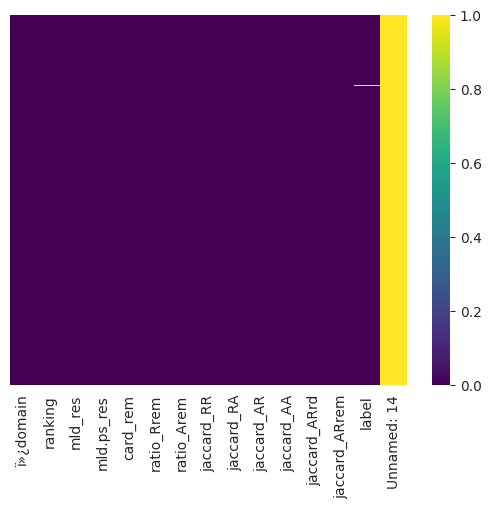

In [110]:
#draw the heat map
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')

<ipython-input-111-40b52873825e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='magma')


<Axes: xlabel='label', ylabel='count'>

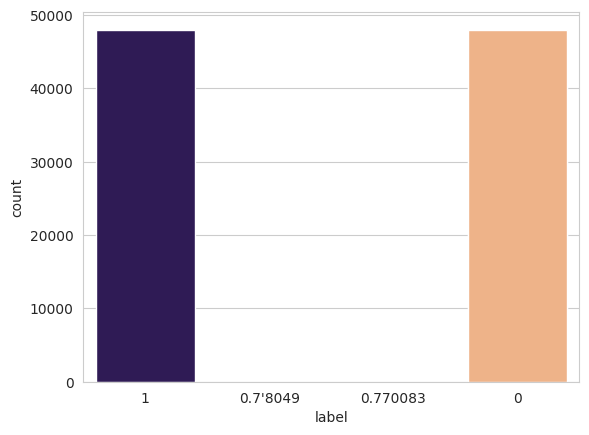

In [111]:
#draw a countplot
sns.set_style('whitegrid')
sns.countplot(x='label', data=data, palette='magma')

<Axes: xlabel='label', ylabel='count'>

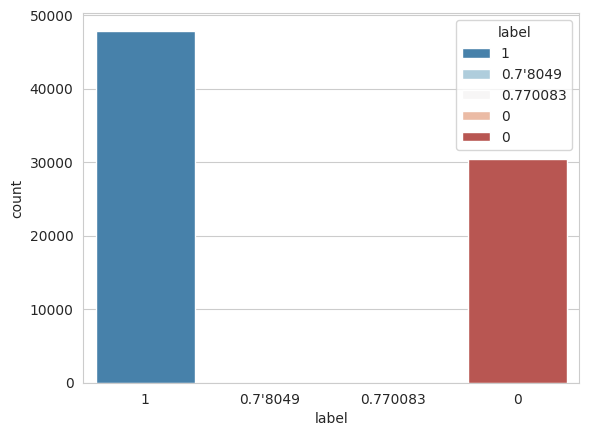

In [112]:
#draw another countplot
sns.set_style('whitegrid')
sns.countplot(x='label', hue='label',data=data, palette='RdBu_r')

<Axes: >

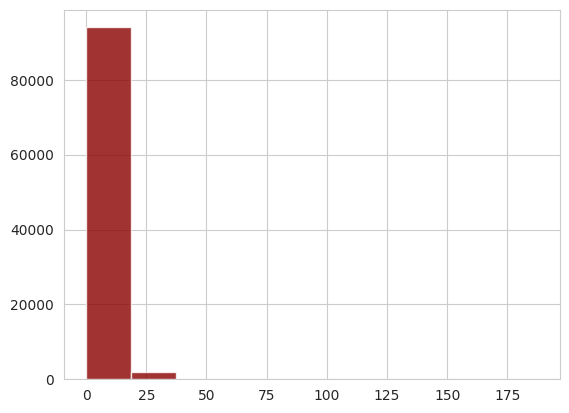

In [113]:
#draw hsitogram
data['card_rem'].hist(bins=10, color='darkred', alpha=0.8)

<Axes: xlabel='mld.ps_res', ylabel='count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128 (\x80) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 147 (\x93) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 7 () missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26 () missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 23 () missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 151 (\x97) missing from current font.
 

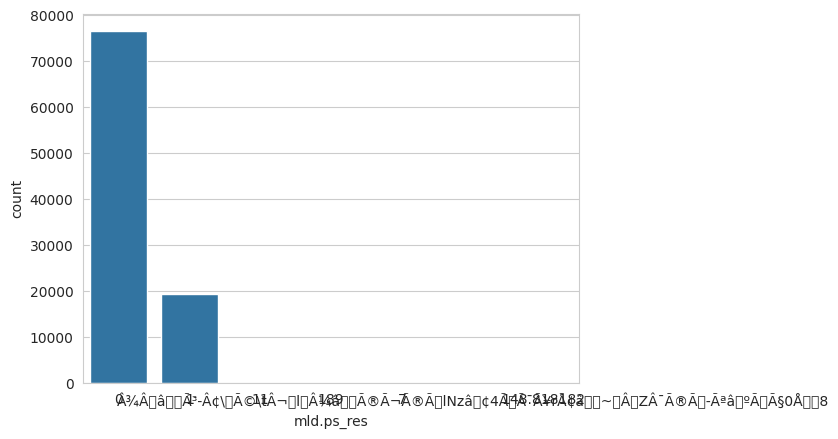

In [114]:
#draw a countplot
sns.countplot(x='mld.ps_res', data=data)

In [115]:
#import the sklearn
from sklearn.model_selection import train_test_split

In [87]:
non_numeric_data = data.applymap(lambda x: isinstance(x, str))
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (optional, depending on your needs)
data = data.dropna()

In [116]:
#divide data into train and test
X_train,X_test,Y_train,Y_test =train_test_split(data.drop('label',axis=1),data['label'], test_size=0.2, random_state=101)


In [117]:
#import logistic regression
from sklearn.linear_model import LogisticRegression

In [118]:
#equate logmodel
logmodel = LogisticRegression()

In [119]:
logmodel

LogisticRegression()

In [120]:
#view X_train
X_train

ï»¿domain   ranking mld_res  \
94790            games.groups.yahoo.com/group/owbn-east/         4       1   
10952  fluchinfos.com/de-europ49/session=js23D2sdqsiu...  10000000       0   
70452  www.theregister.co.uk/2000/10/23/senator_hatch...      3976       1   
33320  docs.google.com/spreadsheet/viewform?formkey=d...         1       1   
7322           www.worldtourbox.com/cielo/index3908.html  10000000       0   
...                                                  ...       ...     ...   
5695   us.battle.net.login.en.rf-login.com/login/en/l...  10000000       0   
73542                          www.ddj.com/cpp/184403791  10000000       1   
83281       www.stottlerhenke.com/ai_general/history.htm  10000000       0   
83467  whatis.techtarget.com/definition/WYSIWYG-what-...      3426       1   
45919  serverupgrade.atwebpages.com/emPageServlet/log...  10000000       0   

      mld.ps_res  card_rem  ratio_Rrem  ratio_Arem  jaccard_RR  jaccard_RA  \
94790          1       4.0  433.500000  446.750000    0.020921    0.021808   
10952          0       5.0   21.200000   17.600000    0.000000    0.000000   
70452          0       3.0   18.000000   18.000000    0.000000    0.000000   
33320          1       6.0   71.166667   78.666667    0.028235    0.032239   
7322           0       3.0  126.666667  127.666667    0.000000    0.000000   
...          ...       ...         ...         ...         ...         ...   
5695           0      14.0  177.285714  180.357143    0.000000    0.000000   
73542          0       1.0   32.000000   18.000000    0.000000    0.000000   
83281          0       4.0   43.750000   44.000000    0.000000    0.000000   
83467          0       6.0  668.166667  669.333333    0.000747    0.000994   
45919          0       3.0  395.000000  415.333333    0.000000    0.000000   

       jaccard_AR  jaccard_AA jaccard_ARrd jaccard_ARrem  Unnamed: 14  
94790    0.018536    0.019972     0.711198      0.861978          NaN  
10952    0.000000    0.000000            0         0.552          NaN  
70452    0.000000    0.000000     0.333333      0.661538          NaN  
33320    0.027365    0.031432     0.886969      0.696226          NaN  
7322     0.000000    0.000000            0       0.79108          NaN  
...           ...         ...          ...           ...          ...  
5695     0.000000    0.000000            0      0.768008          NaN  
73542    0.000000    0.000000     0.666667      0.470588          NaN  
83281    0.000000    0.000000          0.0      0.671429          NaN  
83467    0.000498    0.000746     0.727273      0.931408          NaN  
45919    0.000000    0.000000            0      0.867127          NaN  

[76808 rows x 14 columns]

In [121]:
#Y tain
Y_train

94790    0
10952    1
70452    0
33320    1
7322     1
        ..
5695     1
73542    0
83281    0
83467    0
45919    1
Name: label, Length: 76808, dtype: object

In [131]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Check for non-numeric values in X_train
def check_non_numeric(data):
    non_numeric = data.apply(pd.to_numeric, errors='coerce')
    return data[non_numeric.isna().any(axis=1)]

# Inspect X_train for non-numeric values
non_numeric_X = check_non_numeric(X_train)
print("Non-numeric values in X_train:")
print(non_numeric_X)

# Clean X_train: Instead of dropping rows, replace non-numeric with NaN
X_train_clean = X_train.apply(pd.to_numeric, errors='coerce')

# Handle missing values in X_train (replace NaN with 0)
X_train_clean = X_train_clean.fillna(0)

# Inspect Y_train for unique values that cannot be converted to int
print("Unique values in Y_train that could not be converted to int:")
print(Y_train.unique())

# Clean Y_train: remove rows with invalid values
valid_labels = ['0', '1']  # Define the valid labels
Y_train_clean = Y_train[Y_train.isin(valid_labels)].copy()

# Convert valid labels to integers
Y_train_clean = Y_train_clean.astype(int)

# Reset indices of both DataFrames before aligning and keep track of original indices
X_train_clean = X_train_clean.reset_index()
Y_train_clean = Y_train_clean.reset_index()

# Align X_train_clean and Y_train_clean based on original indices
X_train_clean = X_train_clean[X_train_clean['index'].isin(Y_train_clean['index'])]
Y_train_clean = Y_train_clean[Y_train_clean['index'].isin(X_train_clean['index'])]

# Drop the 'index' column used for alignment
X_train_clean = X_train_clean.drop('index', axis=1)
Y_train_clean = Y_train_clean.drop('index', axis=1)

# Reset indices again after alignment
X_train_clean = X_train_clean.reset_index(drop=True)
Y_train_clean = Y_train_clean.reset_index(drop=True)

# Verify the shape of the cleaned datasets
print("Shape of X_train_clean:", X_train_clean.shape)
print("Shape of Y_train_clean:", Y_train_clean.shape)

# Fit the model again
logmodel.fit(X_train_clean, Y_train_clean)





Non-numeric values in X_train:
       ï»¿domain   ranking mld_res mld.ps_res  card_rem  ratio_Rrem  \
94790      14265         4       1          1       4.0  433.500000   
10952      13430  10000000       0          0       5.0   21.200000   
70452      70920      3976       1          0       3.0   18.000000   
33320      10775         1       1          1       6.0   71.166667   
7322       74248  10000000       0          0       3.0  126.666667   
...          ...       ...     ...        ...       ...         ...   
5695       38052  10000000       0          0      14.0  177.285714   
73542      50026  10000000       1          0       1.0   32.000000   
83281      69684  10000000       0          0       4.0   43.750000   
83467      39951      3426       1          0       6.0  668.166667   
45919      30826  10000000       0          0       3.0  395.000000   

       ratio_Arem  jaccard_RR  jaccard_RA  jaccard_AR  jaccard_AA  \
94790  446.750000    0.020921    0.021808    0.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [134]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# ... (previous code for cleaning X_train) ...

# Clean X_test: Apply the same cleaning steps as for X_train
X_test_clean = X_test.apply(pd.to_numeric, errors='coerce')
X_test_clean = X_test_clean.fillna(0)

#predictions
predictions = logmodel.predict(X_test_clean)  # Use the cleaned X_test

In [135]:
#predictions
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [136]:
from sklearn.metrics import auc, accuracy_score, classification_report,log_loss, confusion_matrix

In [139]:
# Handle missing values in Y_test before converting to integers
Y_test = Y_test.fillna(0).astype(int)  # Replace NaN with 0, then convert to int

print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.03      0.06      9636
           1       0.51      0.99      0.67      9567

    accuracy                           0.51     19203
   macro avg       0.68      0.51      0.37     19203
weighted avg       0.68      0.51      0.37     19203



Axes(0.125,0.11;0.62x0.77)


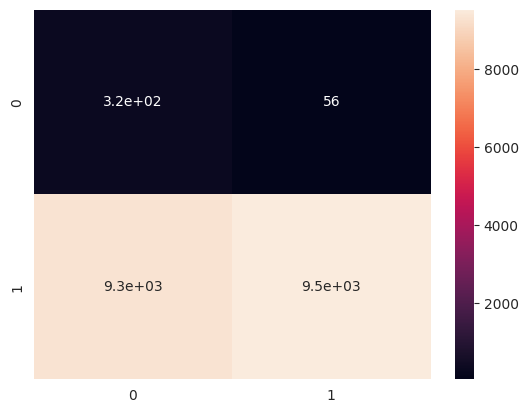

In [140]:
#display the confusion matrix
print(sns.heatmap(confusion_matrix(predictions, Y_test), annot=True))

In [141]:
pip install scikit-plot

In [142]:
import scikitplot as skplt

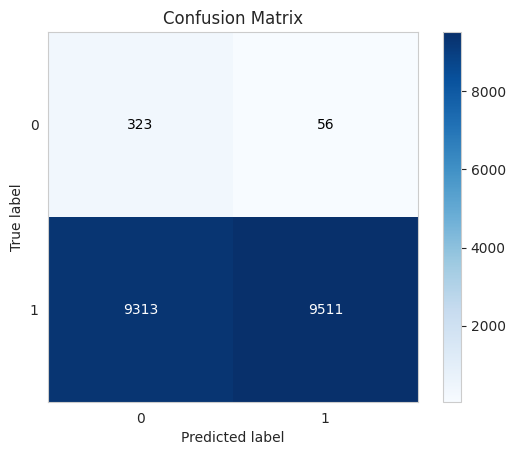

In [143]:
skplt.metrics.plot_confusion_matrix(predictions, Y_test)
plt.show()

In [149]:
import pandas as pd

# Function to convert columns to numeric, coercing errors and filling NaNs
def convert_to_numeric(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

# Identify non-numeric columns
non_numeric_columns = X_test.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Convert non-numeric columns to numeric, coercing errors
X_test_clean = convert_to_numeric(X_test, non_numeric_columns)

# Handle any remaining NaN values (e.g., fill with 0 or another strategy)
X_test_clean = X_test_clean.fillna(0)

# Check if there are any remaining non-numeric columns
non_numeric_columns_after = X_test_clean.select_dtypes(exclude=['number']).columns
print("Non-numeric columns after cleaning:", non_numeric_columns_after)

# Predict the probabilities using the cleaned X_test
predicted_probas = logmodel.predict_proba(X_test_clean)

# Print the predicted probabilities
print(predicted_probas)



Non-numeric columns: Index(['ranking', 'mld_res', 'mld.ps_res', 'jaccard_ARrd', 'jaccard_ARrem'], dtype='object')
Non-numeric columns after cleaning: Index([], dtype='object')
[[0.04768315 0.95231685]
 [0.04768345 0.95231655]
 [0.04768453 0.95231547]
 ...
 [0.04768322 0.95231678]
 [0.04768311 0.95231689]
 [0.04768321 0.95231679]]


In [150]:
predicted_probas

array([[0.04768315, 0.95231685],
       [0.04768345, 0.95231655],
       [0.04768453, 0.95231547],
       ...,
       [0.04768322, 0.95231678],
       [0.04768311, 0.95231689],
       [0.04768321, 0.95231679]])

In [151]:
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5121074832057491


DECISION TREE

In [152]:
data

ï»¿domain   ranking mld_res  \
0      nobell.it/70ffb52d079109dca5664cce6f317373782/...  10000000       1   
1      www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...  10000000       0   
2      serviciosbys.com/paypal.cgi.bin.get-into.herf....  10000000       0   
3      mail.printakid.com/www.online.americanexpress....  10000000       0   
4      thewhiskeydregs.com/wp-content/themes/widescre...  10000000       0   
...                                                  ...       ...     ...   
96006            xbox360.ign.com/objects/850/850402.html       339       1   
96007       games.teamxbox.com/xbox-360/1860/Dead-Space/     63029       1   
96008         www.gamespot.com/xbox360/action/deadspace/       753       1   
96009      en.wikipedia.org/wiki/Dead_Space_(video_game)         6       1   
96010          www.angelfire.com/goth/devilmaycrytonite/      2547       1   

      mld.ps_res  card_rem  ratio_Rrem  ratio_Arem  jaccard_RR  jaccard_RA  \
0              0      18.0  107.611111  107.277778    0.000000    0.000000   
1              0      11.0  150.636364  152.272727    0.000000    0.000000   
2              0      14.0   73.500000   72.642857    0.000000    0.000000   
3              0       6.0  562.000000  590.666667    0.000000    0.000000   
4              0       8.0   29.000000   24.125000    0.000000    0.000000   
...          ...       ...         ...         ...         ...         ...   
96006          1       2.0  142.500000  141.000000    0.009009    0.009091   
96007          0       3.0  114.000000  128.333333    0.002899    0.002577   
96008          1       3.0   91.000000  101.333333    0.000000    0.003106   
96009          1       4.0  682.000000  744.250000    0.033075    0.029412   
96010          1       5.0   32.400000   27.200000    0.022222    0.032680   

       jaccard_AR  jaccard_AA jaccard_ARrd jaccard_ARrem label  Unnamed: 14  
0        0.000000    0.000000          0.8      0.795729     1          NaN  
1        0.000000    0.000000            0      0.768577     1          NaN  
2        0.000000    0.000000            0      0.726582     1          NaN  
3        0.000000    0.000000            0       0.85964     1          NaN  
4        0.000000    0.000000            0      0.748971     1          NaN  
...           ...         ...          ...           ...   ...          ...  
96006    0.006536    0.006601      0.45098      0.846906     0          NaN  
96007    0.002907    0.002584         0.75      0.714623     0          NaN  
96008    0.000000    0.000000     0.111111      0.648571     0          NaN  
96009    0.030250    0.029145     0.809735      0.840323     0          NaN  
96010    0.017341    0.020408     0.636364      0.674157     0          NaN  

[96011 rows x 15 columns]

In [153]:
from sklearn import tree

In [154]:
X = data.drop(columns= 'label')

In [155]:
y=data['label']

In [156]:
y

0        1
1        1
2        1
3        1
4        1
        ..
96006    0
96007    0
96008    0
96009    0
96010    0
Name: label, Length: 96011, dtype: object

In [157]:
#drop null values
y.dropna()

0        1
1        1
2        1
3        1
4        1
        ..
96006    0
96007    0
96008    0
96009    0
96010    0
Name: label, Length: 95915, dtype: object

In [158]:
y

0        1
1        1
2        1
3        1
4        1
        ..
96006    0
96007    0
96008    0
96009    0
96010    0
Name: label, Length: 96011, dtype: object

In [159]:
X

ï»¿domain   ranking mld_res  \
0      nobell.it/70ffb52d079109dca5664cce6f317373782/...  10000000       1   
1      www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...  10000000       0   
2      serviciosbys.com/paypal.cgi.bin.get-into.herf....  10000000       0   
3      mail.printakid.com/www.online.americanexpress....  10000000       0   
4      thewhiskeydregs.com/wp-content/themes/widescre...  10000000       0   
...                                                  ...       ...     ...   
96006            xbox360.ign.com/objects/850/850402.html       339       1   
96007       games.teamxbox.com/xbox-360/1860/Dead-Space/     63029       1   
96008         www.gamespot.com/xbox360/action/deadspace/       753       1   
96009      en.wikipedia.org/wiki/Dead_Space_(video_game)         6       1   
96010          www.angelfire.com/goth/devilmaycrytonite/      2547       1   

      mld.ps_res  card_rem  ratio_Rrem  ratio_Arem  jaccard_RR  jaccard_RA  \
0              0      18.0  107.611111  107.277778    0.000000    0.000000   
1              0      11.0  150.636364  152.272727    0.000000    0.000000   
2              0      14.0   73.500000   72.642857    0.000000    0.000000   
3              0       6.0  562.000000  590.666667    0.000000    0.000000   
4              0       8.0   29.000000   24.125000    0.000000    0.000000   
...          ...       ...         ...         ...         ...         ...   
96006          1       2.0  142.500000  141.000000    0.009009    0.009091   
96007          0       3.0  114.000000  128.333333    0.002899    0.002577   
96008          1       3.0   91.000000  101.333333    0.000000    0.003106   
96009          1       4.0  682.000000  744.250000    0.033075    0.029412   
96010          1       5.0   32.400000   27.200000    0.022222    0.032680   

       jaccard_AR  jaccard_AA jaccard_ARrd jaccard_ARrem  Unnamed: 14  
0        0.000000    0.000000          0.8      0.795729          NaN  
1        0.000000    0.000000            0      0.768577          NaN  
2        0.000000    0.000000            0      0.726582          NaN  
3        0.000000    0.000000            0       0.85964          NaN  
4        0.000000    0.000000            0      0.748971          NaN  
...           ...         ...          ...           ...          ...  
96006    0.006536    0.006601      0.45098      0.846906          NaN  
96007    0.002907    0.002584         0.75      0.714623          NaN  
96008    0.000000    0.000000     0.111111      0.648571          NaN  
96009    0.030250    0.029145     0.809735      0.840323          NaN  
96010    0.017341    0.020408     0.636364      0.674157          NaN  

[96011 rows x 14 columns]

In [160]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [164]:
print(y.describe())  # For numeric summary
print(y.unique())    # To see unique values



count    96011.000000
mean         0.498951
std          0.500000
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64
[1.       0.       0.770083]


In [174]:
clf

DecisionTreeClassifier()

In [175]:
import pydotplus

In [176]:
from IPython.display import Image

In [180]:
print("Number of classes:", len(clf.classes_))
print("Class names:", clf.classes_)


Number of classes: 3
Class names: [0 1 2]


In [181]:
from sklearn import tree
import graphviz

# Print the class names in the model
print("Class names:", clf.classes_)

# Adjust the class names list to match the model's classes
class_names = [str(cls) for cls in clf.classes_]

# Export the tree
dot_data = tree.export_graphviz(clf, feature_names=X.columns,
                                class_names=class_names,
                                filled=True, out_file=None)

# Render the tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree")


Class names: [0 1 2]


'decision_tree.pdf'

In [182]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="jaccard_ARrd <= 0.5\\ngini = 0.5\\nsamples = 96011\\nvalue = [48106, 1, 47904]\\nclass = 0", fillcolor="#fffefe"] ;\n1 [label="card_rem <= 3.5\\ngini = 0.239\\nsamples = 44112\\nvalue = [6130, 1, 37981]\\nclass = 2", fillcolor="#9559e9"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="ï»¿domain <= 50719.0\\ngini = 0.416\\nsamples = 17511\\nvalue = [5161, 1, 12349]\\nclass = 2", fillcolor="#b68cf0"] ;\n1 -> 2 ;\n3 [label="ranking <= 31.0\\ngini = 0.156\\nsamples = 9672\\nvalue = [823, 1, 8848]\\nclass = 2", fillcolor="#8d4be7"] ;\n2 -> 3 ;\n4 [label="card_rem <= 0.5\\ngini = 0.114\\nsamples = 8458\\nvalue = [513, 0, 7945]\\nclass = 2", fillcolor="#8946e7"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1615\\nvalue = [0, 0, 1615]\\nclass = 2", fillcolor="#8139e5"] ;\n4 -> 5 ;\n6 [label="card_rem <= 2.5\\ngini = 0.139\\nsamples = 68

In [183]:
graph=pydotplus.graph_from_dot_data(dot_data)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.154966 to fit



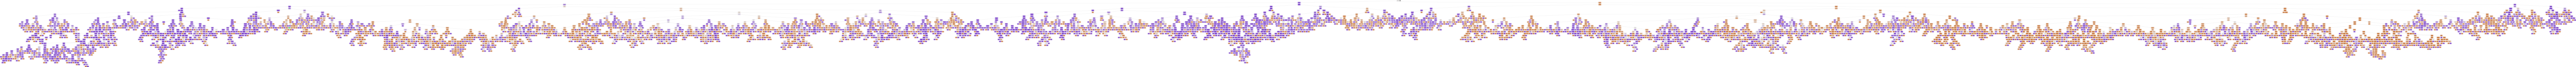

In [184]:
graph


Image(graph.create_png())


In [187]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import function to split data

# Assuming 'X' and 'y' are your full dataset and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data

# Example with parameters to limit tree size
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
clf.fit(X_train, y_train) # Now you can fit the model



DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

In [189]:
import graphviz

# Export the tree
dot_data = tree.export_graphviz(clf, feature_names=X.columns,
                                class_names=class_names,
                                filled=True, out_file=None)

# Modify the DOT source to include size attribute
dot_data = dot_data.replace('digraph Tree {', 'digraph Tree {\nsize="20,20";\n')

# Render the tree with adjusted options
graph = graphviz.Source(dot_data)
graph.render("decision_tree") # Render the graph



'decision_tree.pdf'

In [190]:
# Save the tree to a file
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format='pdf')  # PDF format handles large graphs better


'decision_tree.pdf'

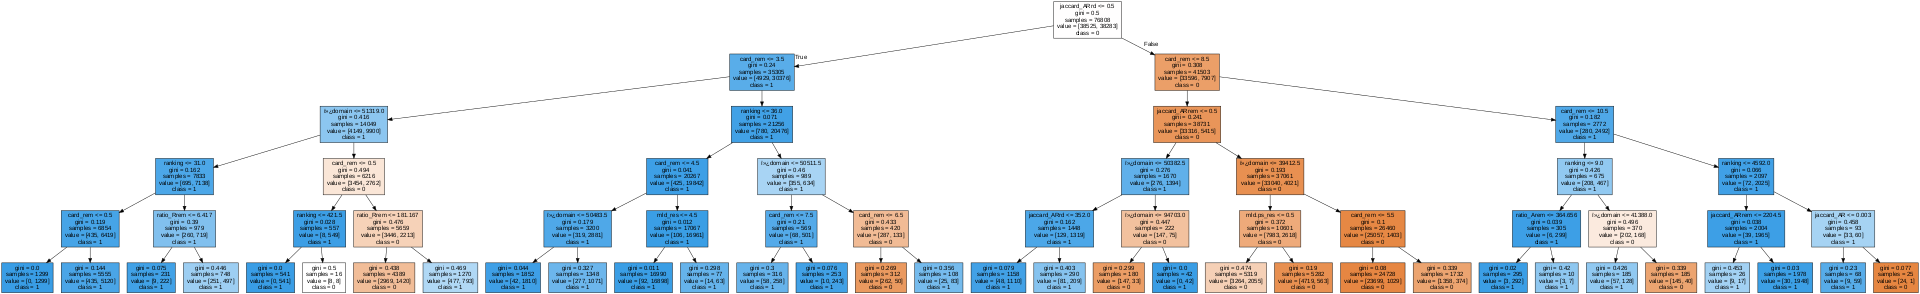

In [196]:
!pip install graphviz
import graphviz
from IPython.display import Image

# ... (Your existing code to generate 'dot_data')

graph = graphviz.Source(dot_data)
graph.render("decision_tree", format='png')  # Render as PNG

# Display the image
Image(filename="decision_tree.png")




In [197]:
testData=[['mld.ps_res',0,0,0,0,1,1,'Phising'],
          ['samples', 1,0,0,0,1,1,'Legit'],
          ['mld_res', 1,0,0,1,1,0,'Phising'],
          ['card_rem',18,15,8,11,10,9,'Legit']]


testData

[['mld.ps_res', 0, 0, 0, 0, 1, 1, 'Phising'],
 ['samples', 1, 0, 0, 0, 1, 1, 'Legit'],
 ['mld_res', 1, 0, 0, 1, 1, 0, 'Phising'],
 ['card_rem', 18, 15, 8, 11, 10, 9, 'Legit']]

In [198]:
data.columns

Index(['ï»¿domain', 'ranking', 'mld_res', 'mld.ps_res', 'card_rem',
       'ratio_Rrem', 'ratio_Arem', 'jaccard_RR', 'jaccard_RA', 'jaccard_AR',
       'jaccard_AA', 'jaccard_ARrd', 'jaccard_ARrem', 'label', 'Unnamed: 14'],
      dtype='object')

In [211]:
import pandas as pd

testData=[['mld.ps_res',0,0,0,0,1,1,'Phising'],
          ['samples', 1,0,0,0,1,1,'Legit'],
          ['mld_res', 1,0,0,1,1,0,'Phising'],
          ['card_rem',18,15,8,11,10,9,'Legit']]

# Convert testData to a DataFrame
testData = pd.DataFrame(testData, columns=['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Result'])  # Replace with your actual column names

# Now you can access the 'Result' column (assuming 'card_rem' was a typo and you meant the last column)
testY = testData['Result']
print(testY)

0    Phising
1      Legit
2    Phising
3      Legit
Name: Result, dtype: object


In [212]:
# prompt: testX=testData.drop(['Column1', 'Column2'],axis=1)

testX=testData.drop(['Column1', 'Result'],axis=1) # Assuming 'Result' is the target variable


In [213]:
testX

Column2  Column3  Column4  Column5  Column6  Column7
0        0        0        0        0        1        1
1        1        0        0        0        1        1
2        1        0        0        1        1        0
3       18       15        8       11       10        9

In [215]:
# Assuming 'Result' is the target variable and you want to keep all other columns for prediction
testX = testData.drop(['Result'], axis=1)

# Check if the column names in testX match those used during training
print(testX.columns)

# If the column names don't match, you'll need to either:
#   - Rename the columns in testX to match the training data
#   - Retrain the model clf using data with the same column names as testX


Index(['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6',
       'Column7'],
      dtype='object')


In [221]:
print(testData.columns)


Index(['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6',
       'Column7', 'Result'],
      dtype='object')


In [222]:
print([col for col in testData.columns if 'Unnamed' in col])


[]


In [224]:
# Columns used in training
print("Training columns:", X.columns)

# Columns in testData
print("Columns in testData:", testData.columns)



Training columns: Index(['ï»¿domain', 'ranking', 'mld_res', 'mld.ps_res', 'card_rem',
       'ratio_Rrem', 'ratio_Arem', 'jaccard_RR', 'jaccard_RA', 'jaccard_AR',
       'jaccard_AA', 'jaccard_ARrd', 'jaccard_ARrem', 'Unnamed: 14'],
      dtype='object')
Columns in testData: Index(['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6',
       'Column7', 'Result'],
      dtype='object')


In [225]:
# Ensure testX contains only columns used during training
common_columns = [col for col in X.columns if col in testData.columns]
testX = testData[common_columns]

# Add missing columns if necessary (with default values, e.g., NaN or 0)
for col in X.columns:
    if col not in testX.columns:
        testX[col] = 0  # Or np.nan depending on your preprocessing needs

# Ensure the columns are in the same order
testX = testX[X.columns]


<ipython-input-225-34d1c22e1611>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-225-34d1c22e1611>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-225-34d1c22e1611>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-225-34d1c22e1

In [226]:
predY = clf.predict(testX)


In [227]:
predY

array([1., 1., 1., 1.])

In [228]:
# prompt: predictions=pd.concat([testData['Name'], testData['Class'],pd.Series(predY, name='Predicted Class')], axis=1)

import pandas as pd
# Assuming 'testData' has columns 'Name' and 'Class'
predictions = pd.concat([testData['Column1'], testData['Result'], pd.Series(predY, name='Predicted Class')], axis=1)
print(predictions)


      Column1   Result  Predicted Class
0  mld.ps_res  Phising              1.0
1     samples    Legit              1.0
2     mld_res  Phising              1.0
3    card_rem    Legit              1.0


In [229]:
predictions

Column1   Result  Predicted Class
0  mld.ps_res  Phising              1.0
1     samples    Legit              1.0
2     mld_res  Phising              1.0
3    card_rem    Legit              1.0

In [230]:
from sklearn.metrics import accuracy_score

In [232]:
# Convert predY to match the type of testY (assuming 'Legit' corresponds to 1 and 'Phising' to 0)
predY_labels = ['Legit' if pred == 1 else 'Phising' for pred in predY]

# Calculate accuracy score using the converted predictions
accuracy = accuracy_score(testY, predY_labels)
print(accuracy)

0.5


In [233]:
pip install wandb

In [234]:
import wandb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [235]:
wandb.login()

True

In [236]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="urlset-phishing3",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset

    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})

# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

In [237]:
pip install pytorch

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: Could not build wheels for pytorch, which is required to install pyproject.toml-based projects


In [238]:
pip install torchvision

In [239]:
#@title
import wandb
import math
import random
import torch, torchvision
import torch.nn as nn
import torchvision.transforms as T

device = "cuda:0" if torch.cuda.is_available() else "cpu"

def get_dataloader(is_train, batch_size, slice=5):
    "Get a training dataloader"
    full_dataset = torchvision.datasets.MNIST(root=".", train=is_train, transform=T.ToTensor(), download=True)
    sub_dataset = torch.utils.data.Subset(full_dataset, indices=range(0, len(full_dataset), slice))
    loader = torch.utils.data.DataLoader(dataset=sub_dataset,
                                         batch_size=batch_size,
                                         shuffle=True if is_train else False,
                                         pin_memory=True, num_workers=2)
    return loader

def get_model(dropout):
    "A simple model"
    model = nn.Sequential(nn.Flatten(),
                         nn.Linear(28*28, 256),
                         nn.BatchNorm1d(256),
                         nn.ReLU(),
                         nn.Dropout(dropout),
                         nn.Linear(256,10)).to(device)
    return model

def validate_model(model, valid_dl, loss_func, log_images=False, batch_idx=0):
    "Compute performance of the model on the validation dataset and log a wandb.Table"
    model.eval()
    val_loss = 0.
    with torch.inference_mode():
        correct = 0
        for i, (images, labels) in enumerate(valid_dl):
            images, labels = images.to(device), labels.to(device)

            # Forward pass ➡
            outputs = model(images)
            val_loss += loss_func(outputs, labels)*labels.size(0)

            # Compute accuracy and accumulate
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

            # Log one batch of images to the dashboard, always same batch_idx.
            if i==batch_idx and log_images:
                log_image_table(images, predicted, labels, outputs.softmax(dim=1))
    return val_loss / len(valid_dl.dataset), correct / len(valid_dl.dataset)

def log_image_table(images, predicted, labels, probs):
    "Log a wandb.Table with (img, pred, target, scores)"
    # 🐝 Create a wandb Table to log images, labels and predictions to
    table = wandb.Table(columns=["image", "pred", "target"]+[f"score_{i}" for i in range(10)])
    for img, pred, targ, prob in zip(images.to("cpu"), predicted.to("cpu"), labels.to("cpu"), probs.to("cpu")):
        table.add_data(wandb.Image(img[0].numpy()*255), pred, targ, *prob.numpy())
    wandb.log({"predictions_table":table}, commit=False)

In [240]:
# Launch 5 experiments, trying different dropout rates
for _ in range(5):
    # 🐝 initialise a wandb run
    wandb.init(
        project="pytorch-intro",
        config={
            "epochs": 10,
            "batch_size": 128,
            "lr": 1e-3,
            "dropout": random.uniform(0.01, 0.80),
            })

    # Copy your config
    config = wandb.config

    # Get the data
    train_dl = get_dataloader(is_train=True, batch_size=config.batch_size)
    valid_dl = get_dataloader(is_train=False, batch_size=2*config.batch_size)
    n_steps_per_epoch = math.ceil(len(train_dl.dataset) / config.batch_size)

    # A simple MLP model
    model = get_model(config.dropout)

    # Make the loss and optimizer
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr)

   # Training
    example_ct = 0
    step_ct = 0
    for epoch in range(config.epochs):
        model.train()
        for step, (images, labels) in enumerate(train_dl):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            train_loss = loss_func(outputs, labels)
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

            example_ct += len(images)
            metrics = {"train/train_loss": train_loss,
                       "train/epoch": (step + 1 + (n_steps_per_epoch * epoch)) / n_steps_per_epoch,
                       "train/example_ct": example_ct}

            if step + 1 < n_steps_per_epoch:
                # 🐝 Log train metrics to wandb
                wandb.log(metrics)

            step_ct += 1

        val_loss, accuracy = validate_model(model, valid_dl, loss_func, log_images=(epoch==(config.epochs-1)))

        # 🐝 Log train and validation metrics to wandb
        val_metrics = {"val/val_loss": val_loss,
                       "val/val_accuracy": accuracy}
        wandb.log({**metrics, **val_metrics})

        print(f"Train Loss: {train_loss:.3f}, Valid Loss: {val_loss:3f}, Accuracy: {accuracy:.2f}")

    # If you had a test set, this is how you could log it as a Summary metric
    wandb.summary['test_accuracy'] = 0.8

    # 🐝 Close your wandb run
    wandb.finish()

Train Loss: 0.352, Valid Loss: 0.279837, Accuracy: 0.92
Train Loss: 0.159, Valid Loss: 0.225502, Accuracy: 0.93
Train Loss: 0.099, Valid Loss: 0.191833, Accuracy: 0.94
Train Loss: 0.248, Valid Loss: 0.182294, Accuracy: 0.94
Train Loss: 0.184, Valid Loss: 0.166335, Accuracy: 0.95
Train Loss: 0.030, Valid Loss: 0.153188, Accuracy: 0.95
Train Loss: 0.076, Valid Loss: 0.156271, Accuracy: 0.95
Train Loss: 0.081, Valid Loss: 0.151724, Accuracy: 0.95
Train Loss: 0.042, Valid Loss: 0.162257, Accuracy: 0.95
Train Loss: 0.031, Valid Loss: 0.150201, Accuracy: 0.95


Train Loss: 0.341, Valid Loss: 0.294438, Accuracy: 0.91
Train Loss: 0.311, Valid Loss: 0.222073, Accuracy: 0.93
Train Loss: 0.108, Valid Loss: 0.196135, Accuracy: 0.94
Train Loss: 0.109, Valid Loss: 0.175855, Accuracy: 0.95
Train Loss: 0.152, Valid Loss: 0.159057, Accuracy: 0.95
Train Loss: 0.080, Valid Loss: 0.159850, Accuracy: 0.95
Train Loss: 0.057, Valid Loss: 0.156660, Accuracy: 0.95
Train Loss: 0.023, Valid Loss: 0.138557, Accuracy: 0.96
Train Loss: 0.050, Valid Loss: 0.143982, Accuracy: 0.96
Train Loss: 0.022, Valid Loss: 0.149878, Accuracy: 0.95


Train Loss: 0.456, Valid Loss: 0.365465, Accuracy: 0.90
Train Loss: 0.354, Valid Loss: 0.295473, Accuracy: 0.91
Train Loss: 0.340, Valid Loss: 0.271761, Accuracy: 0.92
Train Loss: 0.308, Valid Loss: 0.250822, Accuracy: 0.92
Train Loss: 0.282, Valid Loss: 0.238001, Accuracy: 0.93
Train Loss: 0.432, Valid Loss: 0.228691, Accuracy: 0.93
Train Loss: 0.267, Valid Loss: 0.219084, Accuracy: 0.93
Train Loss: 0.330, Valid Loss: 0.217905, Accuracy: 0.93
Train Loss: 0.337, Valid Loss: 0.214878, Accuracy: 0.93
Train Loss: 0.216, Valid Loss: 0.204934, Accuracy: 0.94


Train Loss: 0.270, Valid Loss: 0.293692, Accuracy: 0.92
Train Loss: 0.144, Valid Loss: 0.225057, Accuracy: 0.93
Train Loss: 0.117, Valid Loss: 0.194608, Accuracy: 0.94
Train Loss: 0.132, Valid Loss: 0.192756, Accuracy: 0.94
Train Loss: 0.199, Valid Loss: 0.171269, Accuracy: 0.95
Train Loss: 0.137, Valid Loss: 0.155842, Accuracy: 0.95
Train Loss: 0.096, Valid Loss: 0.150595, Accuracy: 0.95
Train Loss: 0.022, Valid Loss: 0.155749, Accuracy: 0.95
Train Loss: 0.030, Valid Loss: 0.150403, Accuracy: 0.95
Train Loss: 0.032, Valid Loss: 0.150160, Accuracy: 0.95


Train Loss: 0.637, Valid Loss: 0.367909, Accuracy: 0.90
Train Loss: 0.298, Valid Loss: 0.291761, Accuracy: 0.91
Train Loss: 0.423, Valid Loss: 0.264198, Accuracy: 0.92
Train Loss: 0.393, Valid Loss: 0.247834, Accuracy: 0.92
Train Loss: 0.392, Valid Loss: 0.235274, Accuracy: 0.93
Train Loss: 0.290, Valid Loss: 0.226901, Accuracy: 0.93
Train Loss: 0.219, Valid Loss: 0.220670, Accuracy: 0.93
Train Loss: 0.511, Valid Loss: 0.211339, Accuracy: 0.93
Train Loss: 0.167, Valid Loss: 0.210453, Accuracy: 0.93
Train Loss: 0.237, Valid Loss: 0.203659, Accuracy: 0.94
